In [26]:
# Import necessary libraries
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.models import Model
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot as plt

In [5]:
# Set the path to your dataset
train_path = '/content/drive/MyDrive/DataSet/train'
valid_path = '/content/drive/MyDrive/DataSet/validation'
test_dir = '/content/drive/MyDrive/DataSet/test'

In [6]:
# Set the image size
img_size = (224, 224)
batch_size = 32
num_classes = len(os.listdir(train_path))
epochs = 10

In [13]:
# Create the data generator and preprocess the data
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2, #randomly applies shear transformation to the images
                                    zoom_range=0.2, #randomly zooms into the images
                                    horizontal_flip=True, #randomly flips the images horizontally
                                    )

valid_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_data_gen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 333 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [14]:
# Load VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=img_size + (3,))

In [15]:
# Freeze the layers of the pre-trained model
for layer in vgg16.layers:
    layer.trainable = False

# Build the classification model on top of the pre-trained model
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(train_data.num_classes, activation='softmax'))

# Compile the model with an Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epochs,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=valid_data.samples // valid_data.batch_size
)

Epoch 1/10
10/10 [==============================] - 115s 12s/step - loss: 1.2254 - accuracy: 0.4385 - val_loss: 0.9683 - val_accuracy: 0.6250
Epoch 2/10
10/10 [==============================] - 103s 10s/step - loss: 0.7742 - accuracy: 0.7076 - val_loss: 0.9308 - val_accuracy: 0.6562
Epoch 3/10
10/10 [==============================] - 105s 11s/step - loss: 0.5397 - accuracy: 0.8219 - val_loss: 0.9617 - val_accuracy: 0.6875
Epoch 4/10
10/10 [==============================] - 105s 11s/step - loss: 0.4596 - accuracy: 0.8505 - val_loss: 0.7491 - val_accuracy: 0.7188
Epoch 5/10
10/10 [==============================] - 108s 11s/step - loss: 0.4261 - accuracy: 0.8704 - val_loss: 0.9302 - val_accuracy: 0.7500
Epoch 6/10
10/10 [==============================] - 105s 11s/step - loss: 0.3068 - accuracy: 0.9103 - val_loss: 0.9305 - val_accuracy: 0.8125
Epoch 7/10
10/10 [==============================] - 109s 11s/step - loss: 0.2688 - accuracy: 0.9236 - val_loss: 0.8577 - val_accuracy: 0.7812
Epoch 

In [17]:
# Save the model
model.save('/content/drive/MyDrive/Trained_Models/VGG16-M.h5')

In [18]:
s = model.evaluate(train_data, verbose=0)
print("Train Accuracy: %.2f%%" % (s[1]*100))

Train Accuracy: 97.00%


In [21]:
# Evaluate model on test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=32, class_mode='categorical')
s = model.evaluate(test_generator, verbose=0)
print("Test Accuracy: %.2f%%" % (s[1]*100))

Found 42 images belonging to 4 classes.
Test Accuracy: 83.33%


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

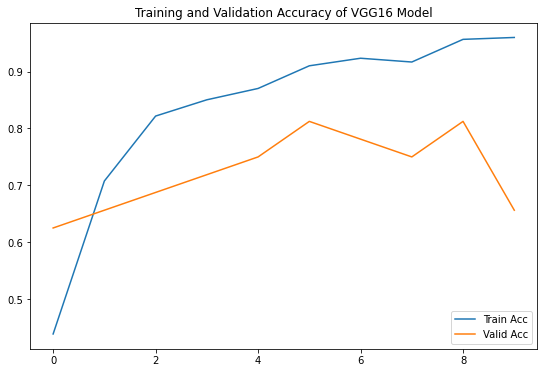

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Train Acc')
plt.plot(range(epochs), val_acc, label='Valid Acc')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of VGG16 Model')
plt.show()

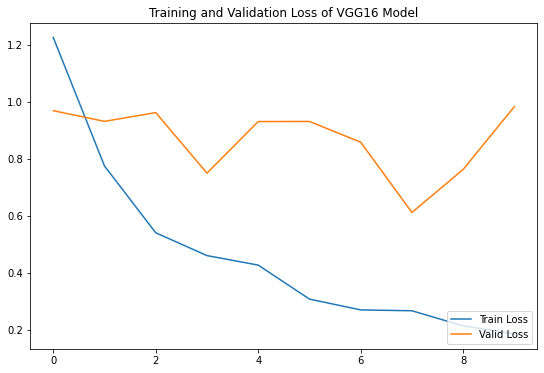

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Valid Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss of VGG16 Model')
plt.show()